# Variational Autoencoder example
This notebook contains a simple example on how can we use a trained Variational Autoencoder to generate novel samples (images)



In [6]:
!git clone --depth=1 https://github.com/raulorteg/SantaVAE

fatal: destination path 'SantaVAE' already exists and is not an empty directory.


In [7]:
import sys
sys.path.append("./SantaVAE")

In [8]:
import torch
from PIL import Image
import numpy as np

from GenerativeSanta.models import CVAE
from GenerativeSanta.plots import image_grid

In [9]:
# create an empty model
model = CVAE(input_size=[32,3,50,50], latent_size=150)

# load the state dictionary
model.load_state_dict(torch.load("./SantaVAE/pretrained/pretrained_2.pkl"))

<All keys matched successfully>

In [10]:
def show_image(xhat: torch.tensor) -> None:
  # now convert it into an image
  images = []
  for img in xhat:
    img = (255 * img).cpu().detach().numpy().astype(np.uint8)
    img = np.transpose(img, (1, 2, 0))
    pil_image = Image.fromarray(img).convert("RGB")
    images.append(pil_image)

  grid = image_grid(images, 4, 8, 50, 50)
  return grid

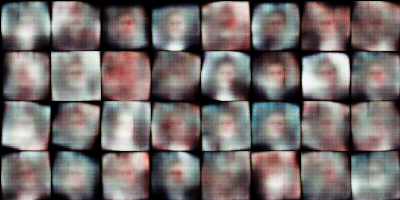

In [20]:
# user-input condition
condition = 1

# lets grab some samples
xhat, zvecs = model.sample_prior(batch_size=32, c=condition)


show_image(xhat=xhat)